In [2]:
import pybedtools
import os

In [3]:
bed1_dir = '/projects/ps-yeolab5/encore/processing/encore_master/'
bed2_dir = '/home/hsher/seqdata/20200728_charlene_clipper3_single_end/'

all_files = os.listdir(bed2_dir)
all_files_filter = [f for f in all_files if 'INPUT' not in f]

def compare(fname):
    
    encore_master_fname = fname.replace('.peaks.', '.peakClusters.')

    bed1 = pybedtools.BedTool(
        os.path.join(
            bed1_dir, 
            encore_master_fname
        )
    ).sort()
    bed2 = pybedtools.BedTool(
        os.path.join(
            bed2_dir, 
            fname
        )
    ).sort()
    num_peaks_1 = bed1.count()
    num_peaks_2 = bed2.count()
    #print("Number of peaks before merging (bed1: {}, bed2: {}".format(num_peaks_1, num_peaks_2))
    
    # merge
    bed1 = bed1.merge(s=True, c='4,5,6', o='distinct,distinct,distinct')
    bed2 = bed2.merge(s=True, c='4,5,6', o='distinct,distinct,distinct')
    
    num_peaks_1 = bed1.count()
    num_peaks_2 = bed2.count()
    #print("Number of peaks after merging (bed1: {}, bed2: {}".format(num_peaks_1, num_peaks_2))
    
    # intersect
    num_intersecting = bed1.intersect(
    bed2, f=0.90, r=True, s=True
    ).count()
    
    # percentage
    overlap_1 = num_intersecting / float(num_peaks_1)
    overlap_2 = num_intersecting / float(num_peaks_2)
    
    return num_peaks_1, num_peaks_2, overlap_1, overlap_2

In [ ]:
import pandas as pd
result = pd.DataFrame(columns = ['num_peak_1', 'num_peak_2', 'precent_overlap1', 'precent_overlap2'], index = all_files_filter)
for f in all_files_filter:
    try:
        np1, np2,perc1, perc2 = compare(f)
        result.loc[f] = [np1, np2, perc1, perc2]
    except:
        print(f)

encode4_batch11b.4056_CLIP1_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch10.4020_CLIP1_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch7.4012_CLIP2_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch10.4020_CLIP2_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch11b.4056_CLIP2_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch11a.4047_CLIP2_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch11a.4047_CLIP1_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch11b.4058_CLIP2_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch11b.4058_CLIP1_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch14.4098_CLIP1_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch11b.4053_CLIP2_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch15.4071_A_IP_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peaks.bed
encode4_batch11a.4038_CLIP1_CLIP.umi.r1.fq.genome-mappedSoS

In [7]:
result.to_csv('clipper3_169-se_results')

In [1]:
import pandas as pd
result = pd.read_csv('clipper3_169-se_results')
result.dropna(inplace = True)

Text(0.5, 1.0, 'single end clipper')

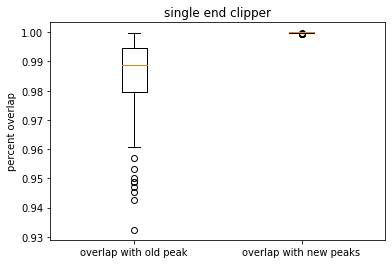

In [3]:
import matplotlib.pyplot as plt
plt.boxplot([result['precent_overlap1'],result['precent_overlap2']])
plt.xticks([1,2],['overlap with old peak', 'overlap with new peaks'])
plt.ylabel('percent overlap')
plt.title('single end clipper')

In [29]:
result.loc[result['precent_overlap1']<0.92]

,num_peak_1,num_peak_2,precent_overlap1,precent_overlap2
410_01_DNAJC17.merged.r2.peaks.bed,155244,140018,0.898379,0.996072
338_02_ILF3.merged.r2.peaks.bed,240087,221729,0.919438,0.995562
363_01_HNRNPA2B1.merged.r2.peaks.bed,212420,193749,0.909858,0.997538
484_01_POLR2G.merged.r2.peaks.bed,187549,172060,0.912199,0.994316
397_01_KRR1.merged.r2.peaks.bed,143086,131164,0.912228,0.995143
642_02_DDX52.merged.r2.peaks.bed,172425,154984,0.893542,0.994096
500_01_RAVER1.merged.r2.peaks.bed,208830,187745,0.89444,0.994892
641_01_ZC3H11A.merged.r2.peaks.bed,277088,254963,0.912356,0.991528
311_01_XRCC6.merged.r2.peaks.bed,125650,114726,0.907871,0.994317
568_02_SAM68.merged.r2.peaks.bed,275423,247357,0.893901,0.995327
